In [1]:
import numpy as np                   # linear algebra
import pandas as pd                  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      # Data Visualization 
import seaborn as sns                # Python library for Vidualization
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
# Import the dataset
dataset = pd.read_csv('college.csv')
dataset.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# total rows and colums in the dataset
dataset.shape

(777, 19)

In [4]:
dataset.rename(columns= {"Unnamed: 0":"college_name"}, inplace = True)

In [5]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   college_name  777 non-null    object 
 1   Private       777 non-null    object 
 2   Apps          777 non-null    int64  
 3   Accept        777 non-null    int64  
 4   Enroll        777 non-null    int64  
 5   Top10perc     777 non-null    int64  
 6   Top25perc     777 non-null    int64  
 7   F.Undergrad   777 non-null    int64  
 8   P.Undergrad   777 non-null    int64  
 9   Outstate      777 non-null    int64  
 10  Room.Board    777 non-null    int64  
 11  Books         777 non-null    int64  
 12  Personal      777 non-null    int64  
 13  PhD           777 non-null    int64  
 14  Terminal      777 non-null    int64  
 15  S.F.Ratio     777 non-null    float64
 16  perc.alumni   777 non-null    int64  
 17  Expend        777 non-null    int64  
 18  Grad.Rate     777 non-null    

In [6]:
pd.set_option('display.float', '{:.2f}'.format)
dataset.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [7]:
dataset["Private"].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [8]:
# Missing values computation
dataset.isnull().sum()

college_name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

## EDA

In [9]:
dataset.groupby(["Private"], as_index = False).agg(app_total=pd.NamedAgg(column="Apps", aggfunc="sum"),\
                                                  acpt_total=pd.NamedAgg(column="Accept", aggfunc="sum"),\
                                                  enl_total=pd.NamedAgg(column="Enroll", aggfunc="sum"),\
                                                  outstate_total=pd.NamedAgg(column="Outstate", aggfunc="sum"),\
                                                  PhD_total=pd.NamedAgg(column="PhD", aggfunc="sum"),\
                                                  avg_expend=pd.NamedAgg(column="Expend", aggfunc="mean"),\
                                                  avg_grad_rate=pd.NamedAgg(column="Grad.Rate", aggfunc="mean"))

,Private,app_total,acpt_total,enl_total,outstate_total,PhD_total,avg_expend,avg_grad_rate
0,No,1214743,830889,347865,1444443,16289,7458.32,56.04
1,Yes,1117530,737722,258174,6667957,40168,10486.35,69.00


### Apps by college type

In [ ]:
plt.figure(figsize=(12, 8))

dataset.loc[dataset.Private == 'Yes', 'Apps'].hist(label="Private College", bins=10)
dataset.loc[dataset.Private == 'No', 'Apps'].hist(label="Non Private College", bins=10, alpha = .7)

plt.xlabel('Apps')
plt.legend()

Non private colleges get more applications than the private ones in general.

### Enrollment vs grad rate by college type

In [ ]:
sns.lmplot(x = 'Enroll', y = 'Grad.Rate', data = dataset, fit_reg = False, hue = 'Private', height = 6, aspect = 1)

There seems to a very weak relationship between number of students enrolled and graduation rate.

### Graduation rate by college type

In [ ]:
plt.figure(figsize=(12, 8))

dataset.loc[dataset.Private == 'Yes', 'Grad.Rate'].hist(label="Private College", bins=30)
dataset.loc[dataset.Private == 'No', 'Grad.Rate'].hist(label="Non Private College", bins=30, alpha = .7)

plt.xlabel('Grad.Rate')
plt.legend()

Even though more students are enrolled in non private colleges, private colleges have better graduation rates in general.

### Outstate by college type

In [ ]:
plt.figure(figsize=(12, 8))

dataset.loc[dataset.Private == 'Yes', 'Outstate'].hist(label="Private College", bins=30)
dataset.loc[dataset.Private == 'No', 'Outstate'].hist(label="Non Private College", bins=30, alpha = .7)

plt.xlabel('Outstate')
plt.legend()

In [ ]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
plt.figure(figsize=(16,  25))
sns.boxplot(data=dataset.drop(['college_name', 'Private'], axis = 1), orient="h", palette="Set2")

Most of the numerical variables have outliers. But we are going to keep them in our training dataset.

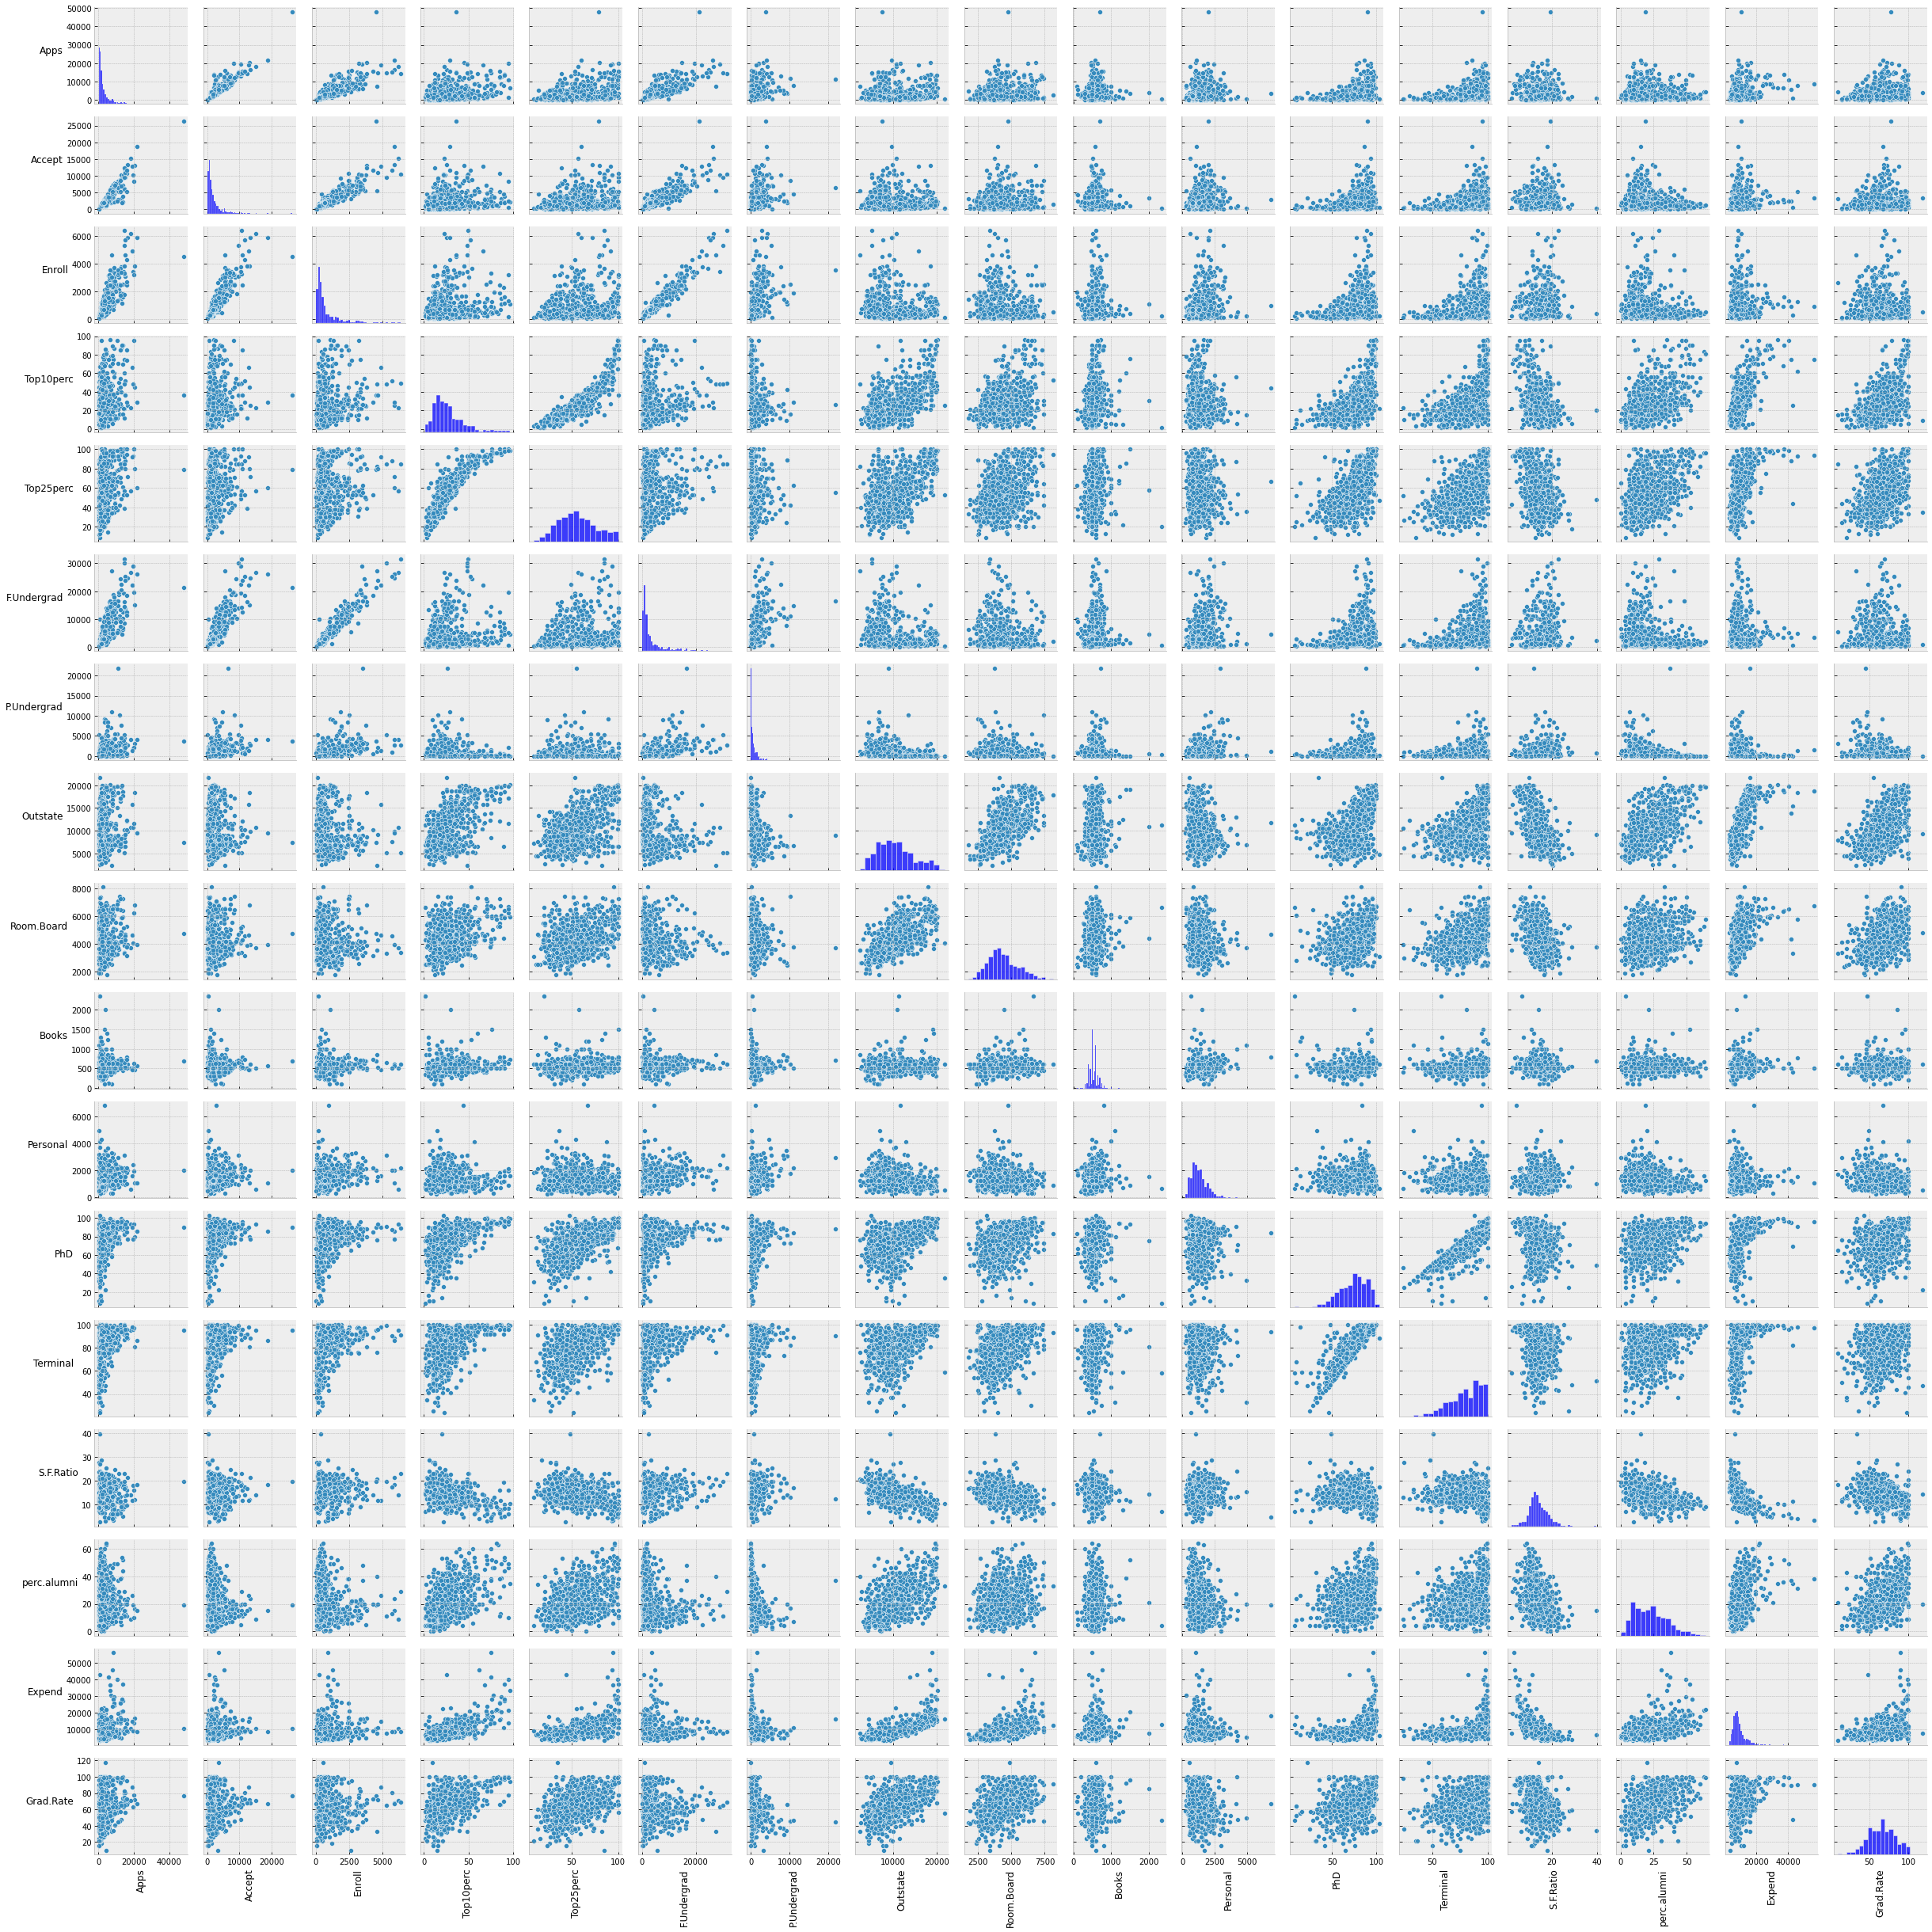

In [43]:
# Create the default pairplot using seaborn
g =sns.pairplot(dataset.drop('Cluster', axis=1), height =2)
for ax in g.axes.flat:
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.savefig('pairplot_all.png', facecolor='w')
plt.show()

In [ ]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
# corr_df = df_num.drop('Cluster', axis = 1).corr()
corr_df

In [ ]:
corr_df.min(axis=1)

In [ ]:
corr_df.min(axis=0)

In [ ]:
corr_df.idxmin()

In [ ]:
# Category encoding
# dataset["Private_code"] = dataset["Private"].astype('category')
# dataset["Private_code"] = dataset.Private_code.cat.codes
# dataset[["Private","Private_code"]].drop_duplicates().reset_index(drop= True)

In [11]:
# adding a binary coded column for cross evaluation
dataset['Cluster'] = dataset['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

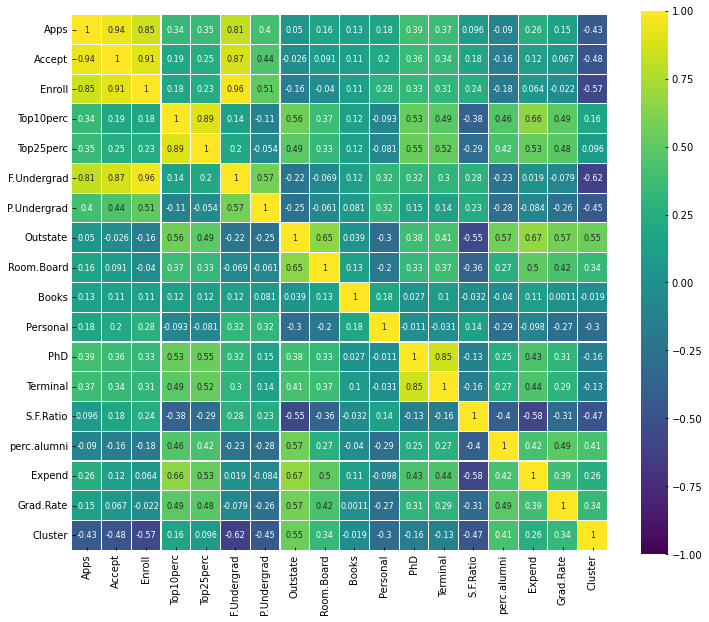

In [28]:
# correlation heatmap
corr = dataset.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr
#             [(corr >= 0.5) | (corr <= -0.4)]
            , 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.tight_layout()
plt.savefig('corr_heatmap_all.png', facecolor='w')

In [ ]:
import pandas_profiling as pp
# Perform data profiling
profile_report = pp.ProfileReport(dataset.drop('Cluster', axis=1))
profile_report

In [14]:
# dataframe creation for separate modeling techniques
dataset1 = dataset.copy()
dataset2 = dataset.copy()

## Feature selection for the model

In [29]:
# Considering only numerical features
# X = dataset1.iloc[:, 2:19].values
X = dataset[['Enroll', 'Outstate']].values
X

array([[  721,  7440],
       [  512, 12280],
       [  336, 11250],
       ...,
       [  695,  6900],
       [ 1317, 19840],
       [  691,  4990]], dtype=int64)

In [30]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
X_scaled

array([[-0.0635089 , -0.74635589],
       [-0.28858421,  0.45749639],
       [-0.47812132,  0.20130469],
       ...,
       [-0.0915087 , -0.88066998],
       [ 0.57833266,  2.33789375],
       [-0.09581636, -1.35574392]])

## K means cluster (supervised)

In [31]:
# Building the Model
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
# to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss = []

# We always assume the max number of cluster would be 10
# You can judge the number of clusters by doing averaging
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


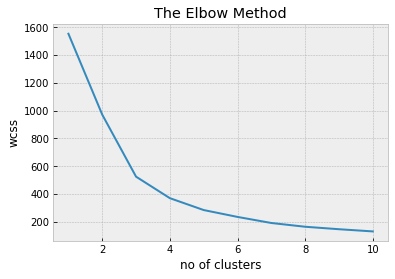

In [32]:
# Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Model Build
from sklearn.cluster import KMeans
kmeansmodel_sup = KMeans(n_clusters= 3)

# supervised learning
kmeansmodel_sup.fit(X_scaled)
# y_kmeans_sup= kmeansmodel_sup.labels_
# Predict the clusters
y_kmeans_sup = kmeansmodel_sup.predict(X_scaled)

In [ ]:
dataset1["Kmean_cluster"] = y_kmeans_sup
dataset1.head()

In [ ]:
df_num.columns

In [ ]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
# plt.scatter(X[y_kmeans_sup == 0, 8], X[y_kmeans_sup == 0, 14], c = 'red', label = 'Cluster 1', zorder = 0,\
#            alpha = .5)
# plt.scatter(X[y_kmeans_sup == 1, 8], X[y_kmeans_sup == 1, 14], c = 'blue', label = 'Cluster 2', zorder = 1,\
#            alpha = .5)
# plt.scatter(X[y_kmeans_sup == 2, 8], X[y_kmeans_sup == 2, 14], c = 'green', label = 'Cluster 3', zorder = 1,\
#            alpha = .5)
# plt.scatter(X[y_kmeans_sup == 3, 8], X[y_kmeans_sup == 3, 14], c = 'yellow', label = 'Cluster 4', zorder = 0,\
#            alpha = .5)
# plt.scatter(X[y_kmeans_sup == 4, 8], X[y_kmeans_sup == 4, 14], c = 'black', label = 'Cluster 5', zorder = 1,\
#            alpha = .5)
# plt.scatter(kmeansmodel_sup.cluster_centers_[:, 0], kmeansmodel_sup.cluster_centers_[:, 1], s = 300, c = 'green', \
#             label = 'Centroids', alpha = .7)
# plt.scatter(X[:, 8], X[:, 14], c = y_kmeans_sup, zorder = 1,\
#            alpha = .6, cmap='viridis')

plt.scatter(X[y_kmeans_sup == 0, 0], X[y_kmeans_sup == 0, 1], c = 'red', label = 'Cluster 1', zorder = 0,\
           alpha = .5)
plt.scatter(X[y_kmeans_sup == 1, 0], X[y_kmeans_sup == 1, 1], c = 'blue', label = 'Cluster 2', zorder = 1,\
           alpha = .5)
plt.scatter(X[y_kmeans_sup == 2, 0], X[y_kmeans_sup == 2, 1], c = 'green', label = 'Cluster 3', zorder = 1,\
           alpha = .5)
plt.title('Clusters of colleges')
plt.xlabel('Applicants')
plt.ylabel('Outstate')
plt.legend()
plt.show()

## Model Evaluation (supervised)

In [ ]:
# Getting counts
dataset1.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(\
            count=pd.NamedAgg(column="college_name", aggfunc="count"))

# dataset.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(count = ("college_name", "count"))

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(dataset1['Cluster'], y_kmeans_sup))

In [ ]:
print(classification_report(dataset1['Cluster'], y_kmeans_sup))

So our supervised clustering model has 78% accuracy.

We do see a large volume of false positives in our clustering through supervised model.

## K means cluster (unsupervised)

In [33]:
# unsupervised learning
kmeansmodel_unsup = KMeans(n_clusters= 3)
y_kmeans_unsup= kmeansmodel_unsup.fit_predict(X_scaled)

In [37]:
dataset2["Kmean_cluster"] = y_kmeans_unsup
dataset2.head()

,college_name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,Kmean_cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.10,12,7041,60,1,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.20,16,10527,56,1,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.90,30,8735,54,1,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.70,37,19016,59,1,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.90,2,10922,15,1,0


In [ ]:
dataset.iloc[:, 2:19].columns

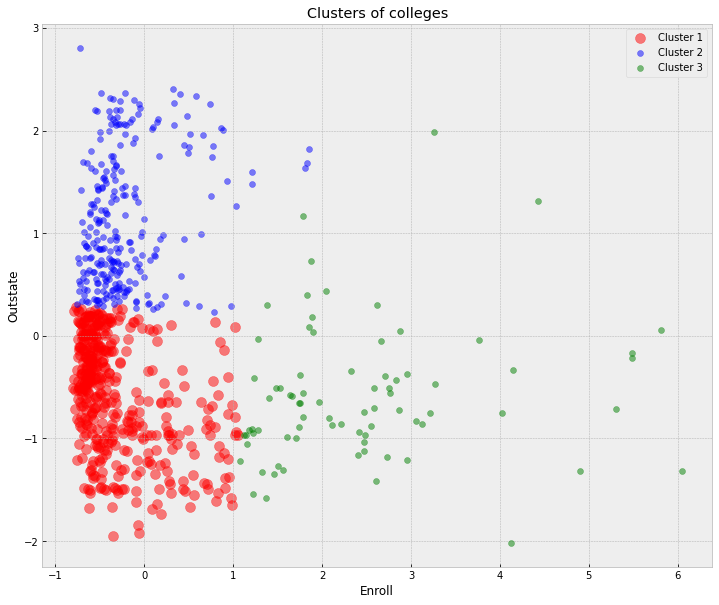

In [35]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
# plt.scatter(X[y_kmeans_unsup == 0, 10], X[y_kmeans_unsup == 0, 12], c = 'red', label = 'Non Private', zorder = 0)
# plt.scatter(X[y_kmeans_unsup == 1, 10], X[y_kmeans_unsup == 1, 12], c = 'blue', label = 'Private', zorder = 1,\
#            alpha = .5)
# plt.scatter(kmeansmodel_unsup.cluster_centers_[:, 0], kmeansmodel_unsup.cluster_centers_[:, 1], s = 300, c = 'green', \
#             label = 'Centroids', alpha = .7)
plt.scatter(X_scaled[y_kmeans_unsup == 0, 0], X_scaled[y_kmeans_unsup == 0, 1] ,s = 100, c = 'red', label = 'Cluster 1', zorder = 0,\
            alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 1, 0], X_scaled[y_kmeans_unsup == 1, 1], c = 'blue', label = 'Cluster 2', zorder = 1,\
           alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 2, 0], X_scaled[y_kmeans_unsup == 2, 1], c = 'green', label = 'Cluster 3', zorder = 2,\
           alpha = .5)
# plt.scatter(X_scaled[y_kmeans_unsup == 3, 14], X_scaled[y_kmeans_unsup == 3, 16], c = 'yellow', label = 'Cluster 4', zorder = 3)
# plt.scatter(X_scaled[y_kmeans_unsup == 4, 14], X_scaled[y_kmeans_unsup == 4, 16], c = 'black', label = 'Cluster 5', zorder = 4,\
#            alpha = .5)

plt.title('Clusters of colleges')
plt.xlabel('Enroll')
plt.ylabel('Outstate')
plt.legend()
plt.show()

## Model Evaluation (unsupervised)

In [38]:
# Getting counts
dataset2.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(\
            count=pd.NamedAgg(column="college_name", aggfunc="count"))

,Private,Cluster,Kmean_cluster,count
0,No,0,0,137
1,No,0,1,3
2,No,0,2,72
3,Yes,1,0,296
4,Yes,1,1,262
5,Yes,1,2,7


In [41]:
print(confusion_matrix(dataset2['Cluster'], y_kmeans_unsup))

[[137   3  72]
 [296 262   7]
 [  0   0   0]]


In [42]:
print(classification_report(dataset2['Cluster'], y_kmeans_unsup))

              precision    recall  f1-score   support

           0       0.32      0.65      0.42       212
           1       0.99      0.46      0.63       565
           2       0.00      0.00      0.00         0

    accuracy                           0.51       777
   macro avg       0.44      0.37      0.35       777
weighted avg       0.81      0.51      0.57       777



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So our supervised clustering model has 22% accuracy.

We do see a large volume of false negatives in our clustering through unsupervised model.